In [1]:
# Import packages/ modules
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import earthpy as et
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns
import datetime
from textwrap import wrap
from statsmodels.formula.api import ols
# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="whitegrid")

In [2]:
# Conditional statement to check and set working directory. 
ea_path = os.path.join(et.io.HOME, 'earth-analytics')

if os.path.exists(ea_path):
    os.chdir(ea_path)
    print("working directory is set to earth-analytics") 
else:     
    print("This path does not exist")
    
# Set base path to download data 
base_path = os.path.join(ea_path, "data")
base_path

working directory is set to earth-analytics


'C:\\Users\\bina_\\earth-analytics\\data'

In [3]:
# Files to download for further analysis
# Define relative path to files
file_path1 = os.path.join(base_path,"output_figures","sandiego_2014_fires", "air_quality_csv",                     
                         "sd_weather_2014_mean_values_only.csv")
file_path2 = os.path.join(base_path,"output_figures","sandiego_2014_fires", "air_quality_csv",                     
                         "sd_chemical_composition_2014_mean_values_only.csv")

# To check if path is created
os.path.exists(file_path1)

True

In [4]:
# Import csv files into dataframe and ensure date time is imported properly.
sd_weather_2014_df = pd.read_csv(file_path1, parse_dates=['Date Local'],
                                index_col=['Date Local'])
sd_weather_2014_df.head()

,T (oF),RH (%),P (mb),wind (mph)
Date Local,,,,
2014-01-01,55.489583,42.916666,999.845833,90.233565
2014-01-02,58.156250,40.027778,998.504167,84.944213
2014-01-03,57.661458,44.597222,996.229167,81.395833
2014-01-04,57.651042,54.402778,996.170833,79.122222
2014-01-05,59.765625,38.708333,999.791667,70.098843


In [5]:
# # Express the names as categories
# categories = pd.plotting.Categorical(sd_2014_df)

# # The parameter 'c' is passed to plt.scatter and will control the color
# plotting.scatter_matrix(data, c=categories.codes, marker='o')

# fig = plt.gcf()
# fig.suptitle("blue: setosa, green: versicolor, red: virginica", size=13)


In [6]:
# df= sd_weather_2014_df.reset_index(inplace = True)
# df
sd_weather_2014_df.reset_index(inplace = True)
sd_weather_2014_df.head()
# pd.plotting.scatter_matrix(sd_2014_df)

,Date Local,T (oF),RH (%),P (mb),wind (mph)
0,2014-01-01,55.489583,42.916666,999.845833,90.233565
1,2014-01-02,58.156250,40.027778,998.504167,84.944213
2,2014-01-03,57.661458,44.597222,996.229167,81.395833
3,2014-01-04,57.651042,54.402778,996.170833,79.122222
4,2014-01-05,59.765625,38.708333,999.791667,70.098843


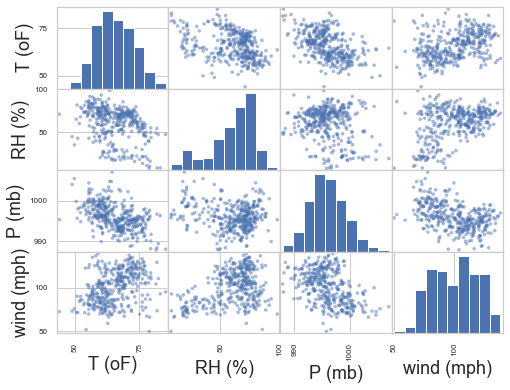

In [8]:
pd.plotting.scatter_matrix(sd_weather_2014_df, s=50, figsize = [8,6]);
plt.show()

In [11]:
########  why renaming df does not work???????????
### does not go backward from column to index----
# df= sd_weather_2014_df.reset_index(inplace = True)
# df
# pd.plotting.scatter_matrix(df, s=50, figsize = [8,6]);
# plt.show()

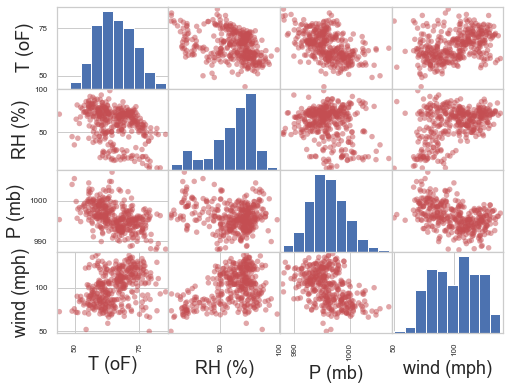

In [20]:

pd.plotting.scatter_matrix(sd_weather_2014_df, s=30, figsize = [8,6], marker='o', color = 'r');
plt.show()

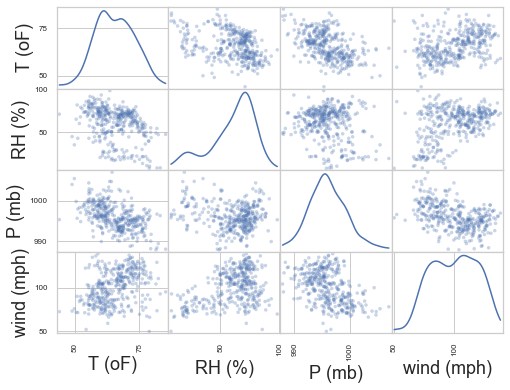

In [12]:
# temp and RH have bionmial distrubution 
# check how to separate %50 RH values???
# from matplotlib import cm
# color = {'columns': 'DarkGreen', 'whiskers': 'DarkOrange',
#           'medians': 'DarkBlue', 'caps': 'Gray'}


pd.plotting.scatter_matrix(sd_weather_2014_df, s=50, figsize = [8,6], diagonal='kde', alpha=0.3);
plt.show()

# Autocorrelation plot
Autocorrelation plots are often used for checking randomness in time series. This is done by computing autocorrelations for data values at varying time lags. If time series is random, such autocorrelations should be near zero for any and all time-lag separations. If time series is non-random then one or more of the autocorrelations will be significantly non-zero. The horizontal lines displayed in the plot correspond to 95% and 99% confidence bands. The dashed line is 99% confidence band. See the Wikipedia entry for more about autocorrelation plots.

In [23]:
df = sd_weather_2014_df.set_index(['Date Local'])
df

,T (oF),RH (%),P (mb),wind (mph)
Date Local,,,,
2014-01-01,55.489583,42.916666,999.845833,90.233565
2014-01-02,58.156250,40.027778,998.504167,84.944213
2014-01-03,57.661458,44.597222,996.229167,81.395833
2014-01-04,57.651042,54.402778,996.170833,79.122222
2014-01-05,59.765625,38.708333,999.791667,70.098843
...,...,...,...,...
2014-12-27,49.895833,35.305555,1005.520833,75.965104
2014-12-28,49.015625,44.861111,1004.070833,73.267969
2014-12-29,50.598958,65.041667,999.845833,71.873177


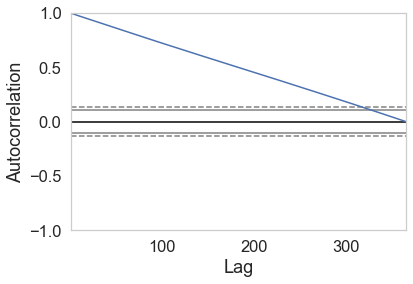

In [24]:
from pandas.plotting import autocorrelation_plot
import datetime
plt.figure()

autocorrelation_plot(df)

In [32]:
sd_pivot_table= sd_weather_2014_df.pivot( columns=['T (oF)', 'RH (%)', 'P (mb)', 'wind (mph)', 'Date Local'], 
                                         

sd_pivot_table.head()

ValueError: Length mismatch: Expected 365 rows, received array of length 5

In [28]:
# from pandas.plotting import andrews_curves

# plt.figure()
# Name = (columns = ['T', 'RH', 'P', 'W'])
# andrews_curves(sd_weather_2014_df, "Name" )

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


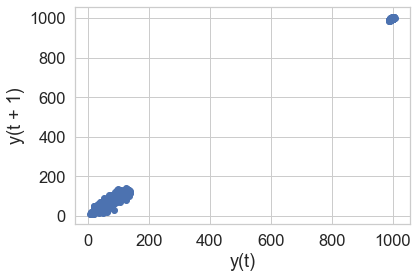

In [25]:
##### ConversionError: Failed to convert timestamps value(s) to axis units
from pandas.plotting import lag_plot
plt.figure()

lag_plot(df)

In [27]:
# TypeError: unsupported operand type(s) for +: 'Timestamp' and 'float'

# from pandas.plotting import bootstrap_plot
# bootstrap_plot(df, size=50, samples=500, color='green')


In [ ]:
# from sklearn import datasets

# iris = datasets.load_iris()
# X = iris.data
# y = iris.target
# df = pd.DataFrame(X, columns = iris.feature_names)

# pd.plotting.scatter_matrix(sd_weather_2014_df)

# colMap={0:"red",1:"blue",2:"yellow"}
# cols=list(map(lambda x:colMap.get(x),iris.target))
# scatter_matrix(df,  diagonal='hist',c=cols)

# How to map colors
# y = sd_weather_2014_df.target
colors=['r', 'g', 'b', 'c']

pd.plotting.scatter_matrix(sd_weather_2014_df, c=colors, figsize = [8,8],
                      s=50, marker = 'D');

# error = 'c' argument has 4 elements, 
# which is not acceptable for use with 'x' with size 365, 'y' with size 365.

# df['y'] = y

# sns.pairplot(df,hue='y')

In [ ]:
sd_2014_df.drop(columns=["Pres_sem"], inplace = True)
sd_2014_df.head()

In [ ]:
# remove index on data  and remove NAN
# pd.plotting.Categorical.scatter_matrix(sd_2014_df)
colors = ["yellow", "red", "green"]
pd.plotting.scatter_matrix(sd_2014_df, c=sd_2014_df.Survived.apply(lambda x:colors[x])
)


plt.show()

In [ ]:
# remove index on data  and remove NAN
# pd.plotting.Categorical.scatter_matrix(sd_2014_df)
colors = ["yellow", "red", "green"]
pd.plotting.scatter_matrix(sd_2014_df, c=sd_2014_df.Survived.apply(lambda x:colors[x])
)


plt.show()